#### Debasis Panda

# importing datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 1000)

In [2]:
# Reading train,test set
#train set 
train=pd.read_csv('train.csv')
#test set
test=pd.read_csv('test.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# import plotly.graph_objs as go
# from sklearn.model_selection import train_test_split

# checking the data set to know about target variable and raw features

In [4]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [5]:
test.head()
#clearly we have to predict the demand column

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


-------------- raw features-> date,hour

---------------target variable-> demand

In [6]:
print(train.info())

print('*'*100)

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB
None


# Data preprocessing

In [7]:
#converting date into date time format
train.date= pd.to_datetime(train.date)
test.date= pd.to_datetime(test.date)

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18247 non-null  datetime64[ns]
 1   hour    18247 non-null  int64         
 2   demand  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 427.8 KB


------------------- no null values present in both train,test sets--------------------

## sorting the date column in train set as we have to predict the model based on future dates

#### sorted the values in an order such that it sorted by a combination of date and hour
this will also be helpful in case of rolling mean or lag tecnhiques as the data will be sorted orderly

In [9]:
train['new_date']=pd.to_datetime(train['date'].astype(str) + ' ' + train['hour'].astype(str)+':00:00' )
train.sort_values(by='new_date',inplace=True)
#### same for test data
test['new_date']=pd.to_datetime(test['date'].astype(str) + ' ' + test['hour'].astype(str)+':00:00' )
test.sort_values(by='new_date',inplace=True)



In [10]:
train.reset_index(drop=True,inplace=True)

In [11]:
# used for sanity check of above code
display(train.tail())
train.head(15)

,date,hour,demand,new_date
18242,2021-02-28,19,95,2021-02-28 19:00:00
18243,2021-02-28,20,88,2021-02-28 20:00:00
18244,2021-02-28,21,39,2021-02-28 21:00:00
18245,2021-02-28,22,104,2021-02-28 22:00:00
18246,2021-02-28,23,85,2021-02-28 23:00:00


,date,hour,demand,new_date
0,2018-08-18,9,91,2018-08-18 09:00:00
1,2018-08-18,10,21,2018-08-18 10:00:00
2,2018-08-18,13,23,2018-08-18 13:00:00
3,2018-08-18,14,104,2018-08-18 14:00:00
4,2018-08-18,15,81,2018-08-18 15:00:00
5,2018-08-18,16,37,2018-08-18 16:00:00
6,2018-08-18,17,27,2018-08-18 17:00:00
7,2018-08-18,18,66,2018-08-18 18:00:00
8,2018-08-18,19,80,2018-08-18 19:00:00
9,2018-08-18,20,52,2018-08-18 20:00:00


## making of date related features could have been made at feature engineering part but  to check certain outliers like day of date (range 1 to 31) or hours(range 1 to 24)

In [12]:
def date_related_features(data):
    # week related features
    data['day_of_week'] = data['date'].dt.dayofweek
    data['week_of_year'] = data['date'].dt.week

    # day number from date
    data['day_from_date'] = data['date'].dt.day # 12-01-2001 so day_from_date is 12

    #month related features
    data['month_of_year'] = data['date'].dt.month 

    #quarter related features
    data['quarter'] = data.date.dt.quarter
    
    data['day_of_year']=data.date.dt.dayofyear
    
    data['year']=data.date.dt.year
    
    return data


In [13]:
# train.head()
# dummy=train.copy()

In [14]:
#date_related_features for train and test
train=date_related_features(train)
test=date_related_features(test)

In [15]:
display(train.head(2))
display(test.head(2))

,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year
0,2018-08-18,9,91,2018-08-18 09:00:00,5,33,18,8,3,230,2018
1,2018-08-18,10,21,2018-08-18 10:00:00,5,33,18,8,3,230,2018


,date,hour,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year
0,2021-03-01,0,2021-03-01 00:00:00,0,9,1,3,1,60,2021
1,2021-03-01,1,2021-03-01 01:00:00,0,9,1,3,1,60,2021


In [16]:
# sanity check on features range
train.describe()

,hour,demand,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,3.025867,26.543706,15.782430,6.470324,2.501233,181.799090,2019.396997
std,6.544963,41.678988,2.003638,15.828694,8.772904,3.618189,1.167955,110.599321,0.810979
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,8.000000,43.000000,1.000000,12.000000,8.000000,3.000000,1.000000,78.000000,2019.000000
50%,13.000000,71.000000,3.000000,27.000000,16.000000,7.000000,3.000000,185.000000,2019.000000
75%,18.000000,98.000000,5.000000,41.000000,23.000000,10.000000,4.000000,282.000000,2020.000000
max,23.000000,379.000000,6.000000,53.000000,31.000000,12.000000,4.000000,366.000000,2021.000000


# splitting of dataset 

##### Splitting done manually not using function so to keep the max date end of the month and min date start of the month 

In [17]:
train_set=train[train.date<'2020-08-01'].copy()
validation=train[train.date>='2020-08-01'].copy()

In [18]:
# train,validation=train_test_split(train, test_size=0.22, shuffle=False)


In [19]:
print('MAX DATES')
display(train_set.date.max())
display(validation.date.max())
print('*'*100)
print('MIN DATES')
display(train_set.date.min())
display(validation.date.min())


MAX DATES


Timestamp('2020-07-31 00:00:00')

Timestamp('2021-02-28 00:00:00')

****************************************************************************************************
MIN DATES


Timestamp('2018-08-18 00:00:00')

Timestamp('2020-08-01 00:00:00')

In [20]:
print(train_set.shape)
print(validation.shape)

(14354, 11)
(3893, 11)


In [21]:
valid1=validation[validation.date<'2020-12-01'].copy()
valid2=validation[validation.date>='2020-12-01'].copy()

In [22]:
print('MAX DATES')
display(valid1.date.max())
display(valid2.date.max())
print('*'*100)
print('MIN DATES')
display(valid1.date.min())
display(valid2.date.min())

MAX DATES


Timestamp('2020-11-26 00:00:00')

Timestamp('2021-02-28 00:00:00')

****************************************************************************************************
MIN DATES


Timestamp('2020-08-01 00:00:00')

Timestamp('2020-12-27 00:00:00')

# EDA

### demand based on hour

<AxesSubplot:xlabel='hour', ylabel='demand'>

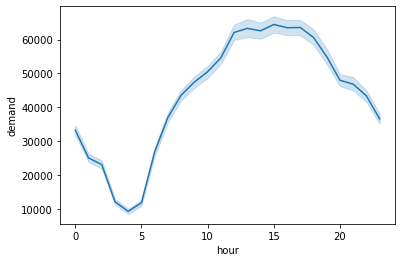

In [23]:
sns.lineplot(train_set['hour'],train_set['demand'],estimator=sum)

In [24]:
pd.DataFrame(train_set.groupby('hour')['demand'].sum()).sort_values(by='demand')

,demand
hour,
4,9331
5,11867
3,12179
2,23120
1,25103
6,26902
0,33274
23,36615
7,37047


------- INFERENCE: Can be said that 10 to 18 hrs have high demand -----

------- bucketisation of hours can be done based on time(morning(5- 10) afternoon(10 - 14))---------

### demand based on month_of_year

In [25]:
pd.DataFrame(train_set.groupby('month_of_year')['demand'].sum()).sort_values(by='demand',ascending=False)

,demand
month_of_year,
11,120345
6,104748
3,98598
5,98089
12,97795
1,94543
2,85517
4,85138
7,80305


<AxesSubplot:xlabel='month_of_year', ylabel='demand'>

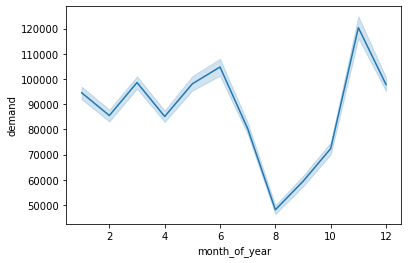

In [26]:
sns.lineplot(train_set['month_of_year'],train_set['demand'],estimator=sum)

In [27]:
pd.DataFrame(train_set.groupby('month_of_year')['demand'].count()).sort_values(by='demand',ascending=False)

,demand
month_of_year,
3,1346
5,1321
1,1282
6,1281
12,1280
11,1263
4,1258
7,1214
2,1202


-------------- INFERENCE:NO NOTICABLE PATTERNS VISIBLE ----------



### demand based on day_of_week

Text(0, 0.5, 'sum of demands')

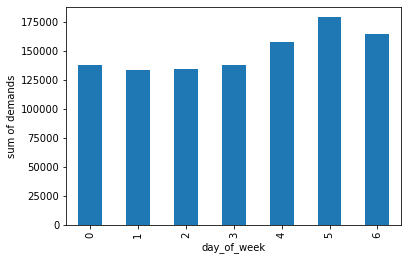

In [28]:
train_set.groupby('day_of_week')['demand'].sum().plot.bar()
plt.xticks(rotation='vertical') ## TO MAKE LABELS IN X AXIS VERTICALLY ROTATED SO WE HAVE SPACE BETWEEN TWO LABLES
plt.ylabel("sum of demands")

<AxesSubplot:xlabel='day_of_week', ylabel='demand'>

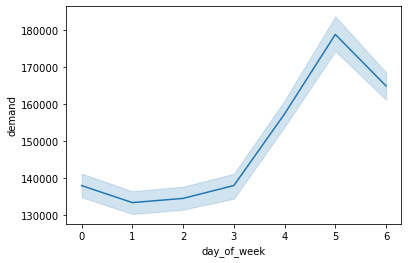

In [29]:
sns.lineplot(train_set['day_of_week'],train_set['demand'],estimator=sum)

In [30]:
pd.DataFrame(train_set.groupby('day_of_week')['demand'].sum()).sort_values(by='demand')

,demand
day_of_week,
1,133358
2,134499
0,137953
3,137977
4,157394
6,164965
5,178928


---------------- INFERENCE:  4,5,6 OR WEEKENDS HAVE HIGH DEMAND --------------

### demand based on week_of_year

<AxesSubplot:xlabel='week_of_year', ylabel='demand'>

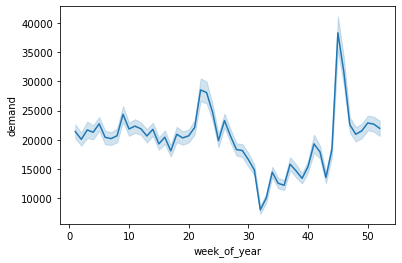

In [31]:
sns.lineplot(train_set['week_of_year'],train_set['demand'],estimator=sum)

Text(0, 0.5, 'count of demands')

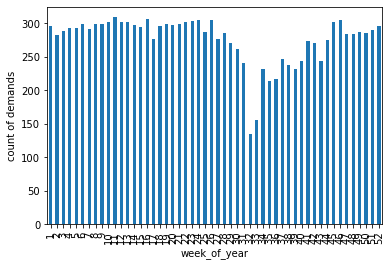

In [32]:
train_set.groupby('week_of_year')['demand'].count().plot.bar()
plt.xticks(rotation='vertical') ## TO MAKE LABELS IN X AXIS VERTICALLY ROTATED SO WE HAVE SPACE BETWEEN TWO LABLES
plt.ylabel("count of demands")

In [33]:
pd.DataFrame(train_set.groupby('week_of_year')['demand'].sum()).sort_values(by='demand')

,demand
week_of_year,
32,8039
33,10053
36,12232
35,12567
39,13420
43,13564
34,14477
38,14692
31,14864


### demand based on day_from_date 

<AxesSubplot:xlabel='day_from_date', ylabel='demand'>

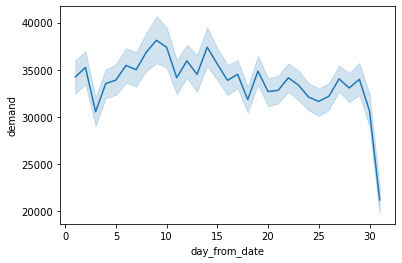

In [34]:
sns.lineplot(train_set['day_from_date'],train_set['demand'],estimator=sum)

In [35]:
pd.DataFrame(train_set.groupby('day_from_date')['demand'].sum()).sort_values(by='demand',ascending=False)

,demand
day_from_date,
9,38140
14,37399
10,37392
8,36875
12,35958
15,35613
6,35468
2,35251
7,35014


Text(0, 0.5, 'count of demands')

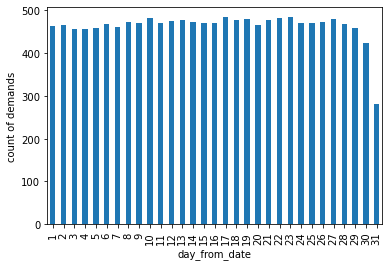

In [36]:
train_set.groupby('day_from_date')['demand'].count().plot.bar()
plt.xticks(rotation='vertical') ## TO MAKE LABELS IN X AXIS VERTICALLY ROTATED SO WE HAVE SPACE BETWEEN TWO LABLES
plt.ylabel("count of demands")

--------------- INFERENCE: LAST DAY OF MONTH HAS LOW DEMAND BUT THAT CAN ALSO BE DUE TO THE FACE THAT SOME MONTHS
END WITH 31, SOME WITH 30 ------------------


### demand based on quarter 

<AxesSubplot:xlabel='quarter', ylabel='demand'>

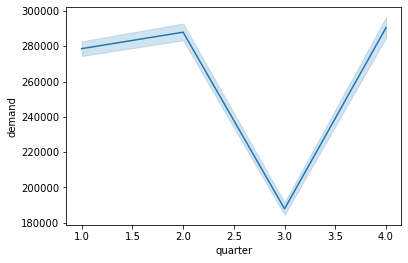

In [37]:
sns.lineplot(train_set['quarter'],train_set['demand'],estimator=sum)

Text(0, 0.5, 'sum of demands')

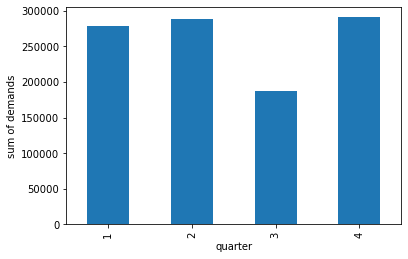

In [38]:
train_set.groupby('quarter')['demand'].sum().plot.bar()
plt.xticks(rotation='vertical') ## TO MAKE LABELS IN X AXIS VERTICALLY ROTATED SO WE HAVE SPACE BETWEEN TWO LABLES
plt.ylabel("sum of demands")

In [39]:
train_set.groupby(['quarter','month_of_year'])['demand'].sum()

quarter  month_of_year
1        1                 94543
         2                 85517
         3                 98598
2        4                 85138
         5                 98089
         6                104748
3        7                 80305
         8                 48163
         9                 59418
4        10                72415
         11               120345
         12                97795
Name: demand, dtype: int64

In [40]:
train_set.groupby(['quarter','month_of_year'])['demand'].count()

quarter  month_of_year
1        1                1282
         2                1202
         3                1346
2        4                1258
         5                1321
         6                1281
3        7                1214
         8                 775
         9                 992
4        10               1140
         11               1263
         12               1280
Name: demand, dtype: int64

---------------- INFERENCE: QUARTER 3 HAS VERY LESS NUMBERS THAN USUAL---------------

-----------------(REASON MAY BE BE BECAUSE OF  RAINY SEASON IN BENGALURU IN THESE MONTHS----------

### a feature engineering step: Making Hour buckets

<AxesSubplot:xlabel='hour', ylabel='demand'>

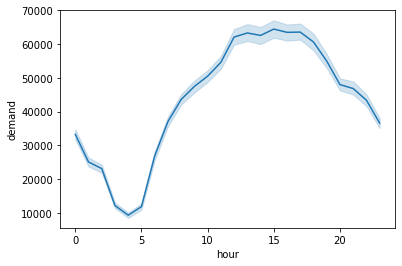

In [41]:
sns.lineplot(train_set['hour'],train_set['demand'],estimator=sum)

In [42]:
 pd.DataFrame(train_set.groupby('hour')['demand'].sum()).sort_values(by='demand')

,demand
hour,
4,9331
5,11867
3,12179
2,23120
1,25103
6,26902
0,33274
23,36615
7,37047


In [43]:
def hour_buckets(hour):
    #midnight and early morning
    if(hour in range(1,6)):
        hour_bucket=1
    # morning  
    elif(hour in range(6,10)):
        hour_bucket=2
    #peak hours   
    elif(hour in range(11,20)):
        hour_bucket=3
    #office return or end of day hours
    else:
        hour_bucket=4
    #print(hour_bucket)
    return hour_bucket

In [44]:
#dummy=train_set.copy()
#train_set['hour_bucket']=np.nan
train_set['hour_bucket']=train_set['hour'].apply(hour_buckets)
valid1['hour_bucket']=valid1['hour'].apply(hour_buckets)
valid2['hour_bucket']=valid2['hour'].apply(hour_buckets)
test['hour_bucket']=test['hour'].apply(hour_buckets)

In [45]:
train_set.head(3)

,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket
0,2018-08-18,9,91,2018-08-18 09:00:00,5,33,18,8,3,230,2018,2
1,2018-08-18,10,21,2018-08-18 10:00:00,5,33,18,8,3,230,2018,4
2,2018-08-18,13,23,2018-08-18 13:00:00,5,33,18,8,3,230,2018,3


### demand with respect to hour_bucket

<AxesSubplot:xlabel='hour_bucket', ylabel='demand'>

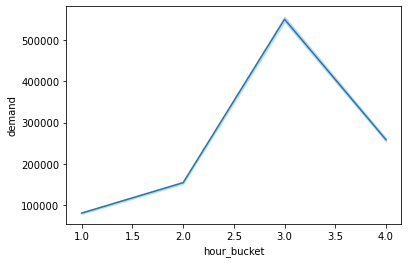

In [46]:
sns.lineplot(train_set['hour_bucket'],train_set['demand'],estimator=sum)

------------- peak hours: 3 bucket(11-20 hrs)-----------------------

### analysis on day_of_year

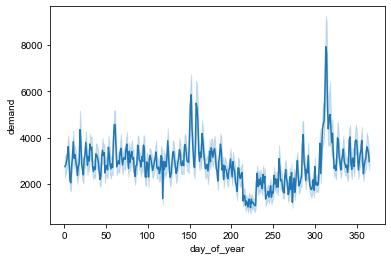

In [47]:
sns.lineplot(train_set['day_of_year'],train_set['demand'],estimator=sum)

sns.set(rc={'figure.figsize':(29.7,14.27)})

# feature engineering

In [48]:
#feature by grouping 2 features and creating a new one
def groupedby_features(df,feature1,feature2,feature3,new_feature):
    
    mapper=df.groupby([feature1,feature2])[feature3].mean().to_dict()
    df[new_feature] = list(zip(df[feature1], df[feature2]))
    df[new_feature]=df[new_feature].map(mapper)       
    
    return df[new_feature]

In [49]:
#hour based
#month and hour combination
train_set['hour_month']=groupedby_features(train_set.copy(),'hour','month_of_year','demand','hour_month')
#quarter hour combination
train_set['hour_quarter']=groupedby_features(train_set.copy(),'hour','quarter','demand','hour_quarter')

#day of week 
#week hour
train_set['week_hour_demand']=groupedby_features(train_set.copy(),'day_of_week','hour','demand','week_hour_demand')
#month day of week
train_set['month_week_demand']=groupedby_features(train_set.copy(),'month_of_year','day_of_week','demand','month_week_demand')

#day from date,month of year
train_set['month_day_date']=groupedby_features(train_set.copy(),'month_of_year','day_from_date','demand','month_day_date')

#week_day_date_demand
train_set['week_day_date_demand']=groupedby_features(train_set.copy(),'week_of_year','day_from_date','demand','week_day_date_demand')

#day_of_week, quarter
train_set['day_week_quarter']=groupedby_features(train_set.copy(),'day_of_week','quarter','demand','day_week_quarter')



In [50]:
train_set.head()

,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket,hour_month,hour_quarter,week_hour_demand,month_week_demand,month_day_date,week_day_date_demand,day_week_quarter
0,2018-08-18,9,91,2018-08-18 09:00:00,5,33,18,8,3,230,2018,2,63.219512,58.619355,71.979798,60.775,61.636364,61.636364,68.295943
1,2018-08-18,10,21,2018-08-18 10:00:00,5,33,18,8,3,230,2018,4,56.761905,61.512500,84.564356,60.775,61.636364,61.636364,68.295943
2,2018-08-18,13,23,2018-08-18 13:00:00,5,33,18,8,3,230,2018,3,68.477273,68.804878,127.356436,60.775,61.636364,61.636364,68.295943
3,2018-08-18,14,104,2018-08-18 14:00:00,5,33,18,8,3,230,2018,3,71.818182,75.118750,129.584158,60.775,61.636364,61.636364,68.295943
4,2018-08-18,15,81,2018-08-18 15:00:00,5,33,18,8,3,230,2018,3,79.093023,78.950920,122.623762,60.775,61.636364,61.636364,68.295943


## lag features 

In [51]:
# sns.lineplot(train_set['hour'],train_set['demand'],estimator=sum)

In [52]:
#  pd.DataFrame(train_set.groupby('hour')['demand'].sum()).sort_values(by='demand')

##### considering a shift of demand in each four/ five hours i have taken 4 lagging features and also rolling window =4

In [53]:
train_set['lag_1'] = train_set['demand'].shift(1)
train_set['lag_2'] = train_set['demand'].shift(2)
train_set['lag_3'] = train_set['demand'].shift(3)
train_set['lag_4'] = train_set['demand'].shift(4)


In [54]:
data = train_set[['date', 'hour','lag_1', 'lag_2', 'lag_3', 'lag_4', 'demand']].copy()
data.head(10)

,date,hour,lag_1,lag_2,lag_3,lag_4,demand
0,2018-08-18,9,NaN,NaN,NaN,NaN,91
1,2018-08-18,10,91.0,NaN,NaN,NaN,21
2,2018-08-18,13,21.0,91.0,NaN,NaN,23
3,2018-08-18,14,23.0,21.0,91.0,NaN,104
4,2018-08-18,15,104.0,23.0,21.0,91.0,81
5,2018-08-18,16,81.0,104.0,23.0,21.0,37
6,2018-08-18,17,37.0,81.0,104.0,23.0,27
7,2018-08-18,18,27.0,37.0,81.0,104.0,66
8,2018-08-18,19,66.0,27.0,37.0,81.0,80
9,2018-08-18,20,80.0,66.0,27.0,37.0,52


## rolling mean

In [55]:
train_set['rolling_mean'] = train_set['demand'].rolling(window=4).mean()
data = train_set[['date','hour', 'rolling_mean', 'demand']].copy()
data.head(10)

,date,hour,rolling_mean,demand
0,2018-08-18,9,NaN,91
1,2018-08-18,10,NaN,21
2,2018-08-18,13,NaN,23
3,2018-08-18,14,59.75,104
4,2018-08-18,15,57.25,81
5,2018-08-18,16,61.25,37
6,2018-08-18,17,62.25,27
7,2018-08-18,18,52.75,66
8,2018-08-18,19,52.50,80
9,2018-08-18,20,56.25,52


###### used bfill to fill these NaN values.

In [56]:
train_set.fillna(method ='bfill',inplace=True)

In [57]:
train_set.head()

,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket,hour_month,hour_quarter,week_hour_demand,month_week_demand,month_day_date,week_day_date_demand,day_week_quarter,lag_1,lag_2,lag_3,lag_4,rolling_mean
0,2018-08-18,9,91,2018-08-18 09:00:00,5,33,18,8,3,230,2018,2,63.219512,58.619355,71.979798,60.775,61.636364,61.636364,68.295943,91.0,91.0,91.0,91.0,59.75
1,2018-08-18,10,21,2018-08-18 10:00:00,5,33,18,8,3,230,2018,4,56.761905,61.512500,84.564356,60.775,61.636364,61.636364,68.295943,91.0,91.0,91.0,91.0,59.75
2,2018-08-18,13,23,2018-08-18 13:00:00,5,33,18,8,3,230,2018,3,68.477273,68.804878,127.356436,60.775,61.636364,61.636364,68.295943,21.0,91.0,91.0,91.0,59.75
3,2018-08-18,14,104,2018-08-18 14:00:00,5,33,18,8,3,230,2018,3,71.818182,75.118750,129.584158,60.775,61.636364,61.636364,68.295943,23.0,21.0,91.0,91.0,59.75
4,2018-08-18,15,81,2018-08-18 15:00:00,5,33,18,8,3,230,2018,3,79.093023,78.950920,122.623762,60.775,61.636364,61.636364,68.295943,104.0,23.0,21.0,91.0,57.25


In [58]:
# (91+21+23+104+81+37+27)/7

In [59]:
# dummy['new_hour']=pd.to_datetime(dummy['date'].astype(str) + ' ' + dummy['hour'].astype(str)+':00:00' )
# dummy.sort_values(by='new_hour',inplace=True)

# Feature Selection

In [60]:
### moving target variable to last column 
train_set['demands']=train_set['demand']
train_set.drop(['demand'],axis=1,inplace=True)
train_set.rename(columns={'demands':'demand'},inplace=True)

## based on correlation pearson

<AxesSubplot:>

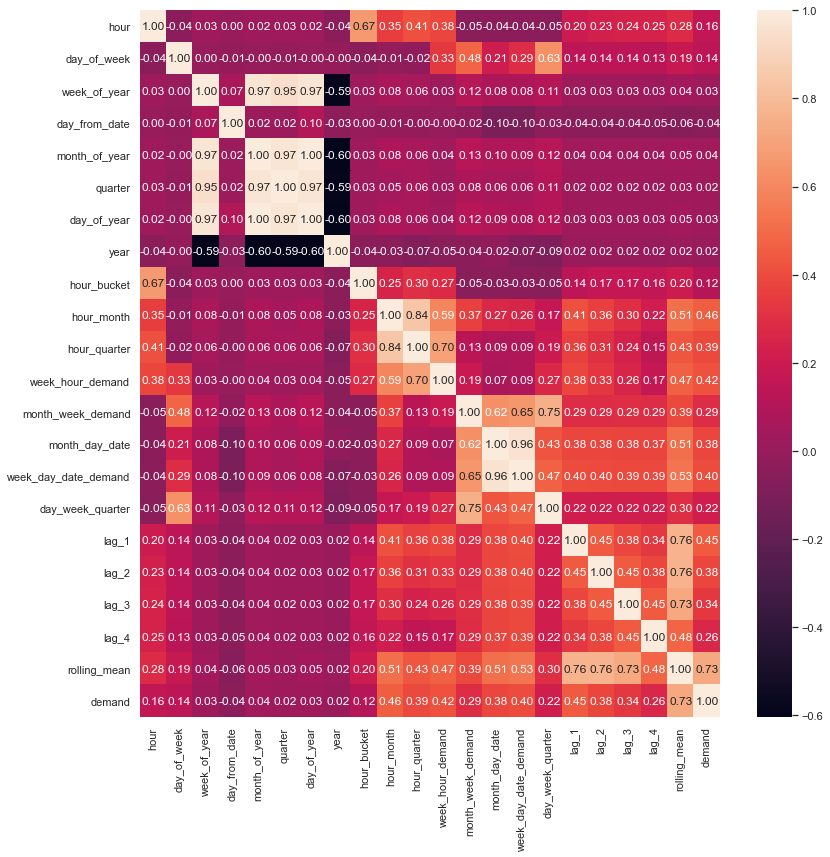

In [61]:
corr=train_set.corr()
fig, ax = plt.subplots(figsize=(13,13))
ax=sns.heatmap(corr,annot=True,fmt='.2f')
ax

In [62]:
X=train_set.drop(labels=["demand","date","new_date"],axis=1)
y=train_set['demand']


In [63]:
X.head()

,hour,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket,hour_month,hour_quarter,week_hour_demand,month_week_demand,month_day_date,week_day_date_demand,day_week_quarter,lag_1,lag_2,lag_3,lag_4,rolling_mean
0,9,5,33,18,8,3,230,2018,2,63.219512,58.619355,71.979798,60.775,61.636364,61.636364,68.295943,91.0,91.0,91.0,91.0,59.75
1,10,5,33,18,8,3,230,2018,4,56.761905,61.512500,84.564356,60.775,61.636364,61.636364,68.295943,91.0,91.0,91.0,91.0,59.75
2,13,5,33,18,8,3,230,2018,3,68.477273,68.804878,127.356436,60.775,61.636364,61.636364,68.295943,21.0,91.0,91.0,91.0,59.75
3,14,5,33,18,8,3,230,2018,3,71.818182,75.118750,129.584158,60.775,61.636364,61.636364,68.295943,23.0,21.0,91.0,91.0,59.75
4,15,5,33,18,8,3,230,2018,3,79.093023,78.950920,122.623762,60.775,61.636364,61.636364,68.295943,104.0,23.0,21.0,91.0,57.25


## select kbest

In [64]:
from sklearn.feature_selection import SelectKBest,f_regression
fs=SelectKBest(score_func=f_regression,k=10)
fit=fs.fit(X,y)


In [65]:
features_score=pd.DataFrame(fit.scores_)
features_pvalues=pd.DataFrame(fit.pvalues_)
features=pd.DataFrame(X.columns)
feature_score=pd.concat([features,features_score,features_pvalues],axis=1)
feature_score.columns=['input',"F","p"]
feature_score.nlargest(19,columns='F')

,input,F,p
20,rolling_mean,16042.384565,0.000000e+00
9,hour_month,3815.292829,0.000000e+00
16,lag_1,3564.303243,0.000000e+00
11,week_hour_demand,3071.747060,0.000000e+00
14,week_day_date_demand,2755.725402,0.000000e+00
10,hour_quarter,2517.069910,0.000000e+00
13,month_day_date,2487.548196,0.000000e+00
17,lag_2,2483.683534,0.000000e+00
18,lag_3,1816.329538,0.000000e+00
12,month_week_demand,1323.360159,3.037416e-277


## making best features in valid1,valid2,test set

In [66]:
valid1.reset_index(inplace=True)
valid2.reset_index(inplace=True)
test.reset_index(inplace=True)


In [67]:
display(test.head(3))
display(valid1.head(3))
display(valid2.head(3))

,index,date,hour,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket
0,0,2021-03-01,0,2021-03-01 00:00:00,0,9,1,3,1,60,2021,4
1,1,2021-03-01,1,2021-03-01 01:00:00,0,9,1,3,1,60,2021,1
2,2,2021-03-01,2,2021-03-01 02:00:00,0,9,1,3,1,60,2021,1


,index,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket
0,14354,2020-08-01,0,2,2020-08-01 00:00:00,5,31,1,8,3,214,2020,4
1,14355,2020-08-01,1,15,2020-08-01 01:00:00,5,31,1,8,3,214,2020,1
2,14356,2020-08-01,2,44,2020-08-01 02:00:00,5,31,1,8,3,214,2020,1


,index,date,hour,demand,new_date,day_of_week,week_of_year,day_from_date,month_of_year,quarter,day_of_year,year,hour_bucket
0,16828,2020-12-27,0,71,2020-12-27 00:00:00,6,52,27,12,4,362,2020,4
1,16829,2020-12-27,1,59,2020-12-27 01:00:00,6,52,27,12,4,362,2020,1
2,16830,2020-12-27,2,75,2020-12-27 02:00:00,6,52,27,12,4,362,2020,1


In [68]:
#2 level groupby features with mapping into validations, test set
def groupedby_features_test(df,df1,df2,df3,feature1,feature2,feature3,new_feature):
    
    mapper=df.groupby([feature1,feature2])[feature3].mean().to_dict()
    df[new_feature] = list(zip(df[feature1], df[feature2]))
    df[new_feature]=df[new_feature].map(mapper)       
    
    
    #valid_1
    df1[new_feature] = list(zip(df1[feature1], df1[feature2]))
    df1[new_feature]=df1[new_feature].map(mapper)       
    #valid_2
    df2[new_feature] = list(zip(df2[feature1], df2[feature2]))
    df2[new_feature]=df2[new_feature].map(mapper)       
    #test
    df3[new_feature] = list(zip(df3[feature1], df3[feature2]))
    df3[new_feature]=df3[new_feature].map(mapper)       
    
    #used bfill as recent values matters in time series data or have larger importance
    df1.fillna(method ='ffill',inplace=True)
    df2.fillna(method ='ffill',inplace=True)
    df3.fillna(method ='ffill',inplace=True)
    
    print(f"{new_feature}' is succesfully made'".format(new_feature))
    return df1[new_feature],df2[new_feature],df3[new_feature]

In [69]:
#hour
valid1['hour_month'],valid2['hour_month'],test['hour_month']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'hour','month_of_year','demand','hour_month')
valid1['hour_quarter'],valid2['hour_quarter'],test['hour_quarter']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'hour','quarter','demand','hour_quarter')

#day of week
valid1['week_hour_demand'],valid2['week_hour_demand'],test['week_hour_demand']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'day_of_week','hour','demand','week_hour_demand')
valid1['month_week_demand'],valid2['month_week_demand'],test['month_week_demand']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'month_of_year','day_of_week','demand','month_week_demand')

#day from date,month of year
valid1['month_day_date'],valid2['month_day_date'],test['month_day_date']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'month_of_year','day_from_date','demand','month_day_date')

#day_of_week, quarter
valid1['day_week_quarter'],valid2['day_week_quarter'],test['day_week_quarter']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'day_of_week','quarter','demand','day_week_quarter')

#week_day_date_demand
valid1['week_day_date_demand'],valid2['week_day_date_demand'],test['week_day_date_demand']=groupedby_features_test(train_set.copy(),valid1.copy(),valid2.copy(),test.copy(),'week_of_year','day_from_date','demand','week_day_date_demand')


hour_month' is succesfully made'
hour_quarter' is succesfully made'
week_hour_demand' is succesfully made'
month_week_demand' is succesfully made'
month_day_date' is succesfully made'
day_week_quarter' is succesfully made'
week_day_date_demand' is succesfully made'


In [70]:
valid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 1419 non-null   int64         
 1   date                  1419 non-null   datetime64[ns]
 2   hour                  1419 non-null   int64         
 3   demand                1419 non-null   int64         
 4   new_date              1419 non-null   datetime64[ns]
 5   day_of_week           1419 non-null   int64         
 6   week_of_year          1419 non-null   int64         
 7   day_from_date         1419 non-null   int64         
 8   month_of_year         1419 non-null   int64         
 9   quarter               1419 non-null   int64         
 10  day_of_year           1419 non-null   int64         
 11  year                  1419 non-null   int64         
 12  hour_bucket           1419 non-null   int64         
 13  hour_month        

## to apply rolling mean and lag features we have to concat the whole data set as target variable is not present in future/test data set

In [71]:
test.date.min()

Timestamp('2021-03-01 00:00:00')

In [72]:
full_data=pd.concat([valid1,valid2,test])

In [73]:
full_data.shape

(11543, 20)

In [74]:
valid1.shape[0]+valid2.shape[0]+test.shape[0]

11543

In [75]:
full_data.reset_index(inplace=True,drop=True)

## lag features

In [76]:
# full_data['lag_1'] = full_data['demand'].shift(1)
# full_data['lag_2'] = full_data['demand'].shift(2)
# full_data['lag_3'] = full_data['demand'].shift(3)
# full_data['lag_4'] = full_data['demand'].shift(4)


## rolling mean

In [ ]:
full_data['rolling_mean']=np.nan

In [ ]:
# full_data['rolling_mean'] = np.where(full_data['demand'].isnull(),full_data['rolling_mean'].rolling(window=4,closed='left').mean(),full_data['demand'].rolling(window=4).mean())


In [ ]:
full_data['rolling_mean']=full_data['demand'].rolling(window=5,closed='left').mean()

In [ ]:
# # full_data['rolling_mean'] = np.where(full_data['demand'].isnull(),full_data['rolling_mean'].rolling(window=4,closed='left').mean(),full_data['demand'].rolling(window=4).mean())
# # full_data.reset_index(inplace=True)
# # full_data.level_0[6]-4
# full_data['rolling_mean'][4:5].mean()

In [ ]:
# for a,i,j in zip(full_data.level_0,full_data['date'],full_data['demand']):
#         if(i>=pd.to_datetime('2021-03-01')):
#                 #print(full_data.level_0[a])
#                 full_data['rolling_mean'][a]=full_data['rolling_mean'][full_data.level_0[a]-4:full_data.level_0[a]].mean()
#                 print(full_data['rolling_mean'][full_data.level_0[a]-4:full_data.level_0[a]])
#                 print(j)

### did not apply lag and rolling mean as was not able to replicate them on test set

# Models

In [77]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [78]:
x_train=train_set[['hour_month','hour_quarter','week_hour_demand','month_week_demand','day_week_quarter','month_day_date','hour','day_of_week']]
y_train=train_set['demand']

In [79]:
x_valid1=valid1[['hour_month','hour_quarter','week_hour_demand','month_week_demand','day_week_quarter','month_day_date','hour','day_of_week']]
y_valid1=valid1['demand']

In [80]:
x_valid2=valid2[['hour_month','hour_quarter','week_hour_demand','month_week_demand','day_week_quarter','month_day_date','hour','day_of_week']]
y_valid2=valid2['demand']

In [81]:
x_test=test[['hour_month','hour_quarter','week_hour_demand','month_week_demand','day_week_quarter','month_day_date','hour','day_of_week']]


In [82]:

# Defining Lists to Store in the Results and Names of Algorithms
# used rmsle as it is the score used in analytic vidya food demand forecasting hackathon 

MSE_Score_train = []
RMSE_Score_train = []
R2_Score_train = []

MSE_Score_valid1 = []
RMSE_Score_valid1 = []
R2_Score_valid1 = []

MSE_Score_valid2 = []
RMSE_Score_valid2 = []
R2_Score_valid2 = []

Algorithm = []

## rf

In [83]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
rf = RandomForestRegressor(max_depth=15,n_estimators=110)
rf.fit(x_train, y_train)

# Predicting the  Results
predicted_rf_train=rf.predict(x_train)
predicted_rf_valid1 = rf.predict(x_valid1)
predicted_rf_valid2=rf.predict(x_valid2)

In [84]:
MSE_Score_train.append(mean_squared_error(y_train, predicted_rf_train))
RMSE_Score_train.append(np.sqrt((mean_squared_error(y_train, predicted_rf_train))))
R2_Score_train.append(r2_score(y_train, predicted_rf_train))


MSE_Score_valid1.append(mean_squared_error(y_valid1, predicted_rf_valid1))
RMSE_Score_valid1.append(np.sqrt((mean_squared_error(y_valid1, predicted_rf_valid1))))
R2_Score_valid1.append(r2_score(y_valid1, predicted_rf_valid1))

MSE_Score_valid2.append(mean_squared_error(y_valid2, predicted_rf_valid2))
RMSE_Score_valid2.append(np.sqrt(mean_squared_error(y_valid2, predicted_rf_valid2)))
R2_Score_valid2.append(r2_score(y_valid2, predicted_rf_valid2))


In [85]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
comparison = pd.DataFrame(list(zip(Algorithm,MSE_Score_train,RMSE_Score_train,R2_Score_train,MSE_Score_valid1,RMSE_Score_valid1,R2_Score_valid1,MSE_Score_valid2,RMSE_Score_valid2,R2_Score_valid2 )), columns = ['Algorithm','MSE_Score_train','RMSE_Score_train','R2_Score_train','MSE_Score_valid1','RMSE_Score_valid1','R2_Score_valid1','MSE_Score_valid2','RMSE_Score_valid2','R2_Score_valid2' ])
comparison

,Algorithm,MSE_Score_train,RMSE_Score_train,R2_Score_train,MSE_Score_valid1,RMSE_Score_valid1,R2_Score_valid1,MSE_Score_valid2,RMSE_Score_valid2,R2_Score_valid2
0,Random Forest Regressor,394.988352,19.874314,0.762862,1885.400844,43.421203,0.169655,1264.242753,35.556191,0.133972


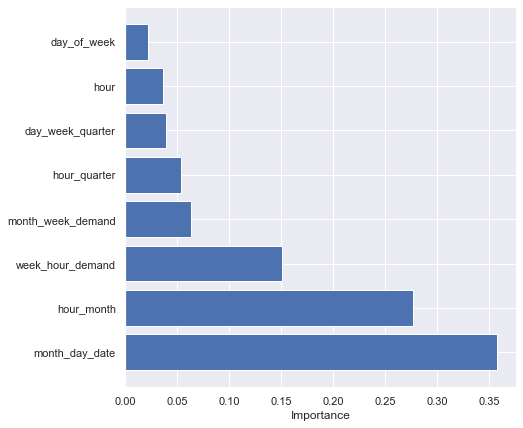

In [86]:
dfimp = pd.DataFrame({'col':x_train.columns, 'imp': rf.feature_importances_}).sort_values('imp', ascending=False).reset_index()
dfimp['cum_imp'] = dfimp['imp'].cumsum()

# TAKE A LOOK AT 15 MOST IMPORTANT COLUMNS

dfimp[:15]

plt.figure(figsize=(7,7))
plt.barh(dfimp[:15]['col'], dfimp[:15]['imp'])
plt.xlabel('Importance')
plt.show()

## lgbm

In [87]:
import lightgbm as ltb
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('LGBM Regressor')
lt = ltb.LGBMRegressor(max_depth=5,n_estimators=150)
lt.fit(x_train, y_train) 


# Predicting the  Results
predicted_lt_train=lt.predict(x_train)
predicted_lt_valid1 = lt.predict(x_valid1)
predicted_lt_valid2=lt.predict(x_valid2)

In [88]:
MSE_Score_train.append(mean_squared_error(y_train, predicted_lt_train))
RMSE_Score_train.append(np.sqrt((mean_squared_error(y_train, predicted_lt_train))))
R2_Score_train.append(r2_score(y_train, predicted_lt_train))


MSE_Score_valid1.append(mean_squared_error(y_valid1, predicted_lt_valid1))
RMSE_Score_valid1.append(np.sqrt((mean_squared_error(y_valid1, predicted_lt_valid1))))
R2_Score_valid1.append(r2_score(y_valid1, predicted_lt_valid1))

MSE_Score_valid2.append(mean_squared_error(y_valid2, predicted_lt_valid2))
RMSE_Score_valid2.append(np.sqrt(mean_squared_error(y_valid2, predicted_lt_valid2)))
R2_Score_valid2.append(r2_score(y_valid2, predicted_lt_valid2))


In [89]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
comparison = pd.DataFrame(list(zip(Algorithm,MSE_Score_train,RMSE_Score_train,R2_Score_train,MSE_Score_valid1,RMSE_Score_valid1,R2_Score_valid1,MSE_Score_valid2,RMSE_Score_valid2,R2_Score_valid2 )), columns = ['Algorithm','MSE_Score_train','RMSE_Score_train','R2_Score_train','MSE_Score_valid1','RMSE_Score_valid1','R2_Score_valid1','MSE_Score_valid2','RMSE_Score_valid2','R2_Score_valid2' ])
comparison

,Algorithm,MSE_Score_train,RMSE_Score_train,R2_Score_train,MSE_Score_valid1,RMSE_Score_valid1,R2_Score_valid1,MSE_Score_valid2,RMSE_Score_valid2,R2_Score_valid2
0,Random Forest Regressor,394.988352,19.874314,0.762862,1885.400844,43.421203,0.169655,1264.242753,35.556191,0.133972
1,LGBM Regressor,866.601231,29.438091,0.479721,1830.712537,42.786827,0.193740,1229.247165,35.060621,0.157945


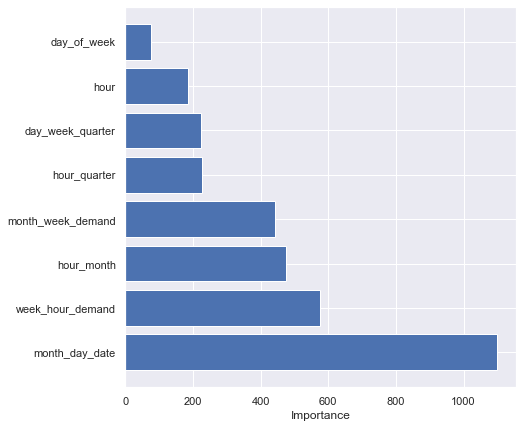

In [91]:
dfimp = pd.DataFrame({'col':x_train.columns, 'imp': lt.feature_importances_}).sort_values('imp', ascending=False).reset_index()
dfimp['cum_imp'] = dfimp['imp'].cumsum()

# TAKE A LOOK AT 15 MOST IMPORTANT COLUMNS

dfimp[:15]

plt.figure(figsize=(7,7))
plt.barh(dfimp[:15]['col'], dfimp[:15]['imp'])
plt.xlabel('Importance')
plt.show()

#### reason of choosing lgbm: better rmse score(low rmse score), better r2_score(high r2 as compared to rf)

In [ ]:
break

## making of csv for uploading

In [ ]:
test.head()

In [ ]:
x_test.head()

In [ ]:
predicted_lt_test=lt.predict(x_test)

In [ ]:
lt1 = pd.DataFrame({
     'date' : test['date'],
     'hour' : test.hour,
     'demand':predicted_lt_test
})
lt1.to_csv("lt_final.csv", index=False)